### Исходные данные

Данные о гипотезах для увеличения выручки, а также данные с результатами после проведения A/B тестирования.

### Задача

1. Приоритезировать гипотезы.
2. Проанализировать А/В тест.
3. Принять решение по результатам теста : 
- Остановить тест, зафиксировать победу одной из групп. 
- Остановить тест, зафиксировать отсутствие различий между группами. 
- Продолжить тест.

### План исследования:

1. Изучим общую информацию о данных.
2. Выполним предобработку данных: обработаем пропуски, дубликаты, приведем данные в нужный формат.
3. Применим фреймворки ICE и RICE для приоритезаии гипотез.
4. Построим график кумулятивной выручки по группам. 
5. Построим график кумулятивного среднего чека по группам.
6. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 
7. Построим график кумулятивного среднего количества заказов на посетителя по группам. 
8. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
9. Построим точечный график количества заказов по пользователям.
10. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. 
11. Построим точечный график стоимостей заказов.
12. Посчитаем 95-й и 99-й перцентили стоимости заказов.
13. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 
14. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
15. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 
16. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
17. Примем решения по результатам теста.

In [3]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
plt.rcParams['figure.figsize']=(12,6)
pd.options.display.max_colwidth = 150

In [4]:
try: 
    hypothesis = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')
except: 
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

Первая часть: приоритизация гипотез

In [5]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Приведем названия столбцов к нижнему регистру.

In [6]:
hypothesis.columns = hypothesis.columns.str.lower()

In [7]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [8]:
hypothesis.duplicated().sum()

0

С данными все в порядке (нет пропусков, дупликатов, формат данных верный)

Примненим фреймоворк ICE для приоритезации гипотез.

In [9]:
hypothesis['ICE'] = np.round((hypothesis['confidence'] * hypothesis['impact'] / hypothesis['efforts']), 2)

In [10]:
hypothesis.sort_values('ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Примненим фреймоворк RICE для приоритезации гипотез.

In [11]:
hypothesis['RICE'] = np.round(hypothesis['reach'] * hypothesis['confidence'] * hypothesis['impact'] / hypothesis['efforts'], 2)

In [12]:
hypothesis.sort_values('RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


В явных лидерах для фремворках ICE и RICE являются гипотезы: "добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", "добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", поэтому первоначально стоит протестировать их. Гипотезы "показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию" и "добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" также показывают неплохи результаты, поэтому после можно протестировать их. Несмотря на то, что у гипотезы "запустить акцию, дающую скидку на товар в день рождения" самый наивысший параметр ICE, измнения от этой гипотезы затрагивают очень малую долю пользователей(параметр reach=1), поэтому параметр RICE у нее находится лишь на 5 месте.

Фремворк ICE легко применим, он не требует много данных и расчетов, фремворк RICE использует более объективные данные и чёткие критерии для измерения переменных, а не личные ощущения от 1 до 10.  Этот фреймворк учитывает больше важных факторов для приоритизации. 


1) ICE фреймворк подойдет в том случае, когда:
- нужно быстро приоритизировать гипотезы по готовой формуле и не искать точные данные для разных переменных отдельно.
- известно мало данных о продукте, пользователях и нет возможности их собрать.
- продукт разрабатывается с нуля и неоткуда достать данные о пользователях и рынке.

2) RICE фреймворк подойдет в том случае, когда:
- есть много данных о продукте, их можно собрать и проанализировать.
-  нужны более объективные критерии для измерения параметров.ё

Часть 2. Анализ A/B-теста

In [13]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [15]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Приведем данные к типу даты.

In [17]:
orders['date'] = pd.to_datetime(orders['date'])

In [18]:
visitors['date'] = pd.to_datetime(visitors['date'])

Проверим дубликаты.

In [19]:
orders.duplicated().sum()

0

In [20]:
visitors.duplicated().sum()

0

Дубликаты не обнаружены.

Отбрем пользователей, которые принимали участие в тестировании в обеих группах.

Пользователи, которые принимали участие в тестировании в двух группах.

In [21]:
orders.groupby('visitorId')['group'].nunique().reset_index().query('group > 1').head()

,visitorId,group
2,8300375,2
44,199603092,2
51,232979603,2
55,237748145,2
66,276558944,2


Удалим данных пользователей из данных

In [22]:
orders = orders[~(orders['visitorId'].isin(orders.groupby('visitorId')['group'].nunique().reset_index().query('group > 1')['visitorId'].to_numpy()))]

In [23]:
orders = orders.reset_index(drop=True)

In [24]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,3797467345,1196621759,2019-08-15,9759,B
3,2282983706,2322279887,2019-08-15,2308,B
4,182168103,935554773,2019-08-15,2210,B


Проверим еще раз, не осталось ли пользователей, участвовавших в нескольких группах теста одновременно.

In [25]:
orders.groupby('visitorId')['group'].nunique().reset_index().query('group > 1').count()

visitorId    0
group        0
dtype: int64

In [26]:
orders['group'].value_counts()

group
B    548
A    468
Name: count, dtype: int64

В тесте две группы. 

In [27]:
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [28]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

Тест проводился один месяц с 1 по 31 августа 2019 года.

In [29]:
orders.query('group == "A"')['visitorId'].nunique()

445

In [30]:
orders.query('group == "B"')['visitorId'].nunique()

528

Количество уникальных пользователей в группе A - 445, B - 586. Группы можно считать сбалансрованными. 

Найдем куммулятивную выручку по группам А и B.

In [31]:
cumulativeRevenueA = orders.query('group == "A"').groupby('date')[['revenue', 'transactionId']].agg({'revenue':'sum', 'transactionId': 'nunique'}).cumsum()

In [32]:
cumulativeRevenueB = orders.query('group == "B"').groupby('date')[['revenue', 'transactionId']].agg({'revenue':'sum', 'transactionId': 'nunique'}).cumsum()

In [33]:
cumulativeRevenueA.head(10)

,revenue,transactionId
date,,
2019-08-01,142779,23
2019-08-02,234381,42
2019-08-03,346854,66
2019-08-04,388030,77
2019-08-05,474413,99
2019-08-06,515332,114
2019-08-07,638580,130
2019-08-08,727219,144
2019-08-09,861456,155


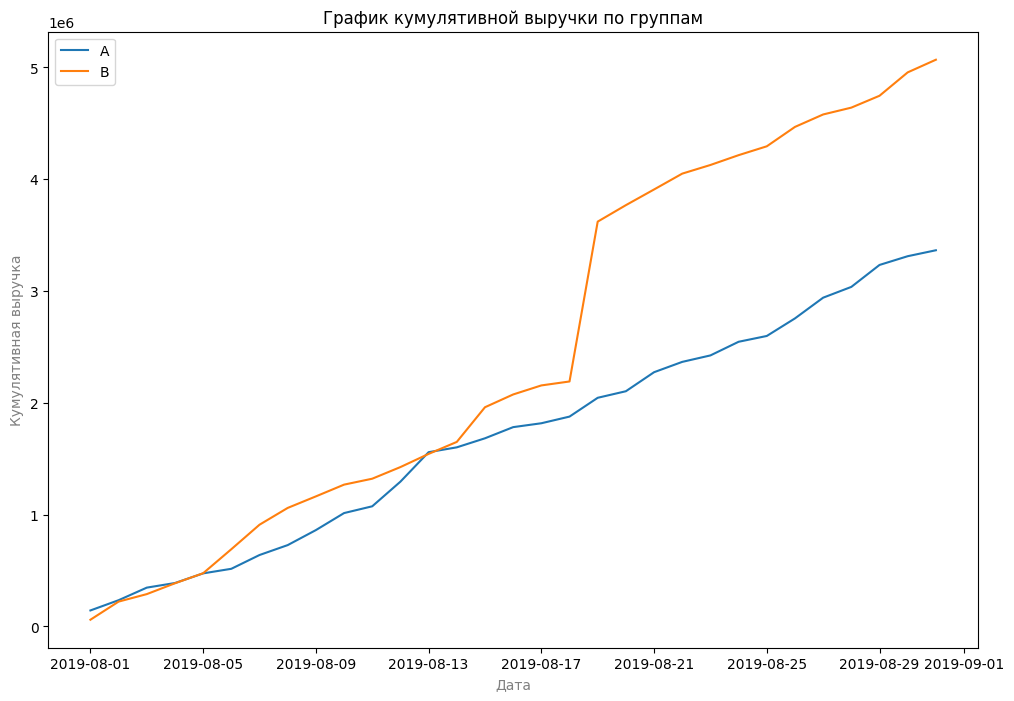

In [34]:
plt.figure(figsize=(12,8))
plt.plot(cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дата', color='gray')
plt.ylabel('Кумулятивная выручка', color='gray')
plt.title('График кумулятивной выручки по группам')
plt.legend()
plt.show()

Выручка увеличивается на протяжении всего периода у обеих групп. У группы B выручка стабильно выше группы А, а также наблюдается резкий скачок в увеличинии в середине периода.

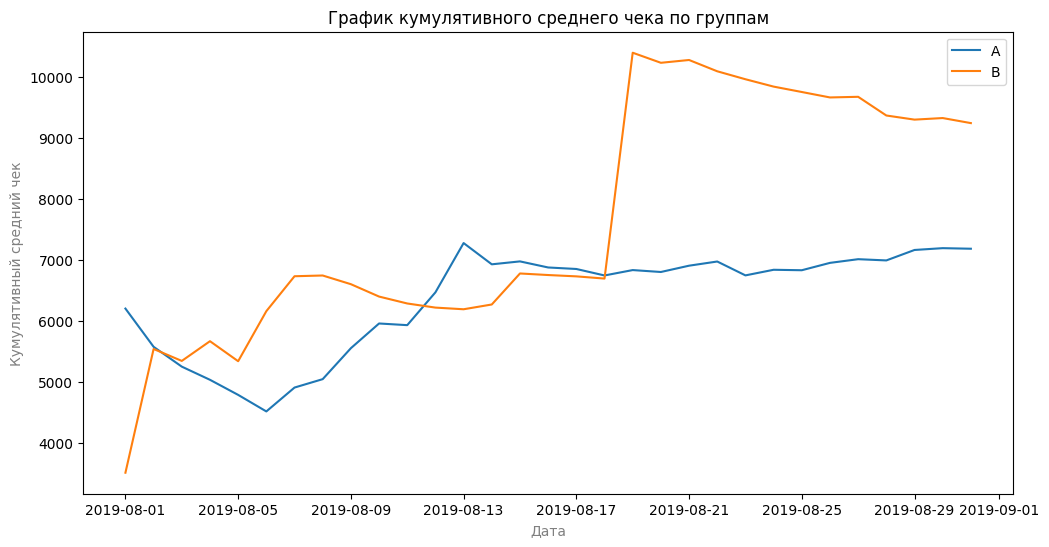

In [35]:
plt.plot(cumulativeRevenueA['revenue'] / cumulativeRevenueA['transactionId'], label='A')
plt.plot(cumulativeRevenueB['revenue'] / cumulativeRevenueB['transactionId'], label='B')
plt.xlabel('Дата', color='gray')
plt.ylabel('Кумулятивный средний чек', color='gray')
plt.title('График кумулятивного среднего чека по группам')
plt.legend()
plt.show()

Средний чек становится равномерным к концу периода. У группы B есть также резкий скачок в увеличении среднего чека.

Объединим данные по группам.

In [36]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', suffixes=('A', 'B'))

In [37]:
mergedCumulativeRevenue.columns = ['revenueA', 'ordersA', 'revenueB', 'ordersB']

In [38]:
mergedCumulativeRevenue.head(10)

,revenueA,ordersA,revenueB,ordersB
date,,,,
2019-08-01,142779,23,59758,17
2019-08-02,234381,42,221801,40
2019-08-03,346854,66,288850,54
2019-08-04,388030,77,385740,68
2019-08-05,474413,99,475648,89
2019-08-06,515332,114,690490,112
2019-08-07,638580,130,909654,135
2019-08-08,727219,144,1059795,157
2019-08-09,861456,155,1162961,176


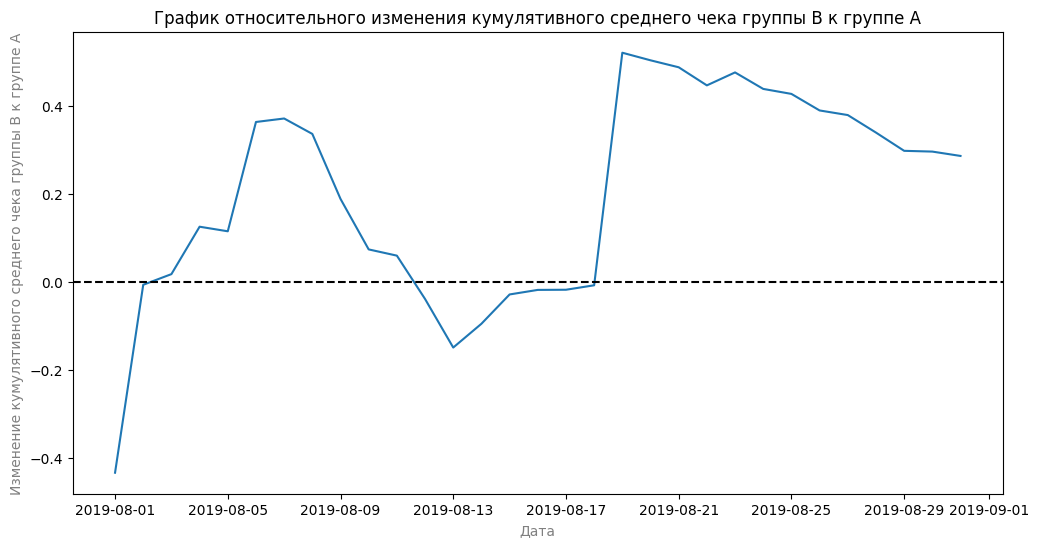

In [39]:
plt.plot((mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) / (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1)
plt.xlabel('Дата', color='gray')
plt.ylabel('Изменение кумулятивного среднего чека группы B к группе A', color='gray')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Куммулятивное среднее у группы B выше группы А за исключением начального периода и даты 13.08.2019. Также в нескольких точках график различия между группами сильно.

In [40]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


Объединим данные по группам.

In [41]:
visitorsA = visitors.query('group == "A"').groupby('date')['visitors'].sum().cumsum().reset_index()

In [42]:
visitorsB = visitors.query('group == "B"').groupby('date')['visitors'].sum().cumsum().reset_index()

In [43]:
mergeVisitors = visitorsA.merge(visitorsB, on='date', suffixes=('A', 'B'))

In [44]:
cumulativeData = mergedCumulativeRevenue.merge(mergeVisitors, on='date')

In [45]:
cumulativeData.head(10)

,date,revenueA,ordersA,revenueB,ordersB,visitorsA,visitorsB
0,2019-08-01,142779,23,59758,17,719,713
1,2019-08-02,234381,42,221801,40,1338,1294
2,2019-08-03,346854,66,288850,54,1845,1803
3,2019-08-04,388030,77,385740,68,2562,2573
4,2019-08-05,474413,99,475648,89,3318,3280
5,2019-08-06,515332,114,690490,112,3985,3935
6,2019-08-07,638580,130,909654,135,4629,4644
7,2019-08-08,727219,144,1059795,157,5239,5298
8,2019-08-09,861456,155,1162961,176,5856,5908
9,2019-08-10,1013731,170,1268123,198,6262,6277


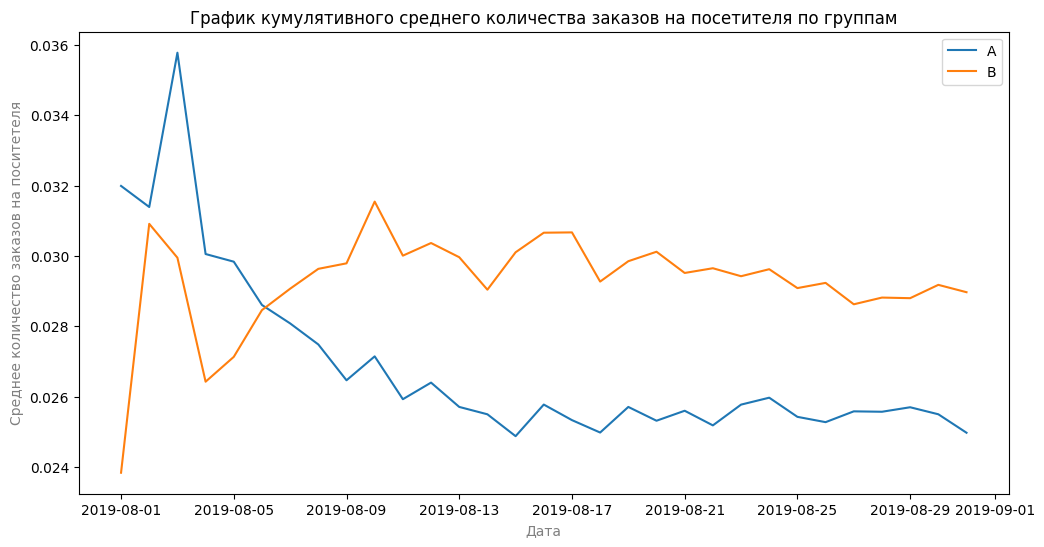

In [46]:
plt.plot(cumulativeData['date'], cumulativeData['ordersA'] / cumulativeData['visitorsA'] , label='A')
plt.plot(cumulativeData['date'], cumulativeData['ordersB'] / cumulativeData['visitorsB'], label='B')
plt.xlabel('Дата', color='gray')
plt.ylabel('Среднее количество заказов на поситетеля', color='gray')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.legend()
plt.show()

Среднее количество заказов на поситетеля у группы B выше,чем у группы А.

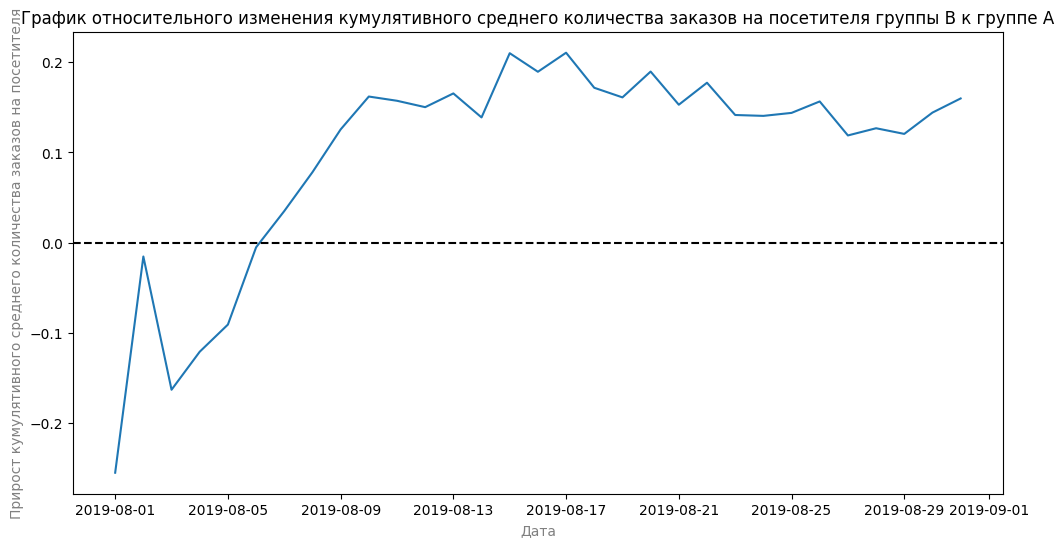

In [47]:
plt.plot(cumulativeData['date'],(cumulativeData['ordersB'] / cumulativeData['visitorsB']) / (cumulativeData['ordersA'] / cumulativeData['visitorsA']) - 1 , label='A')
plt.xlabel('Дата', color='gray')
plt.ylabel('Прирост кумулятивного среднего количества заказов на посетителя', color='gray')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

В начале группа B проигрывала группе A, после вырвалась вперед. Потом среднее количество заказов на посетителя для группы B уменьшалось, но все еще остается выше, чем у группы А. 

In [48]:
ordersByUsers = orders.groupby('visitorId')['transactionId'].agg('nunique').reset_index()

In [49]:
ordersByUsers.columns = ['userId', 'orders']

In [50]:
ordersByUsers.head()

,userId,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


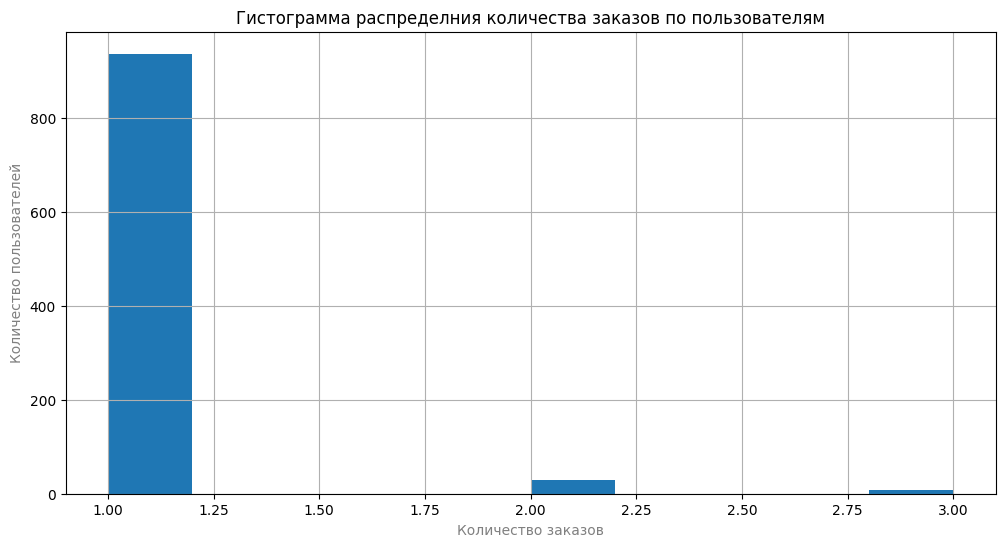

In [51]:
ordersByUsers['orders'].hist()
plt.title('Гистограмма распределния количества заказов по пользователям')
plt.xlabel('Количество заказов', color='gray')
plt.ylabel('Количество пользователей', color='gray')
plt.show()

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-4 заказами тоже значительна. 

In [52]:
pd.Series(range(0,len(ordersByUsers)))

0        0
1        1
2        2
3        3
4        4
      ... 
968    968
969    969
970    970
971    971
972    972
Length: 973, dtype: int64

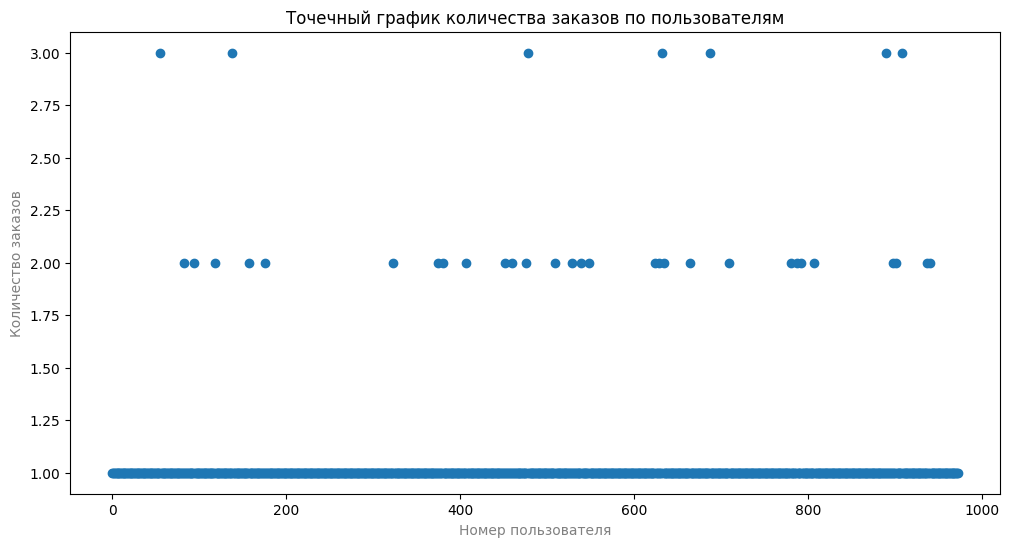

In [53]:
plt.scatter(ordersByUsers.index, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Номер пользователя', color='gray')
plt.ylabel('Количество заказов', color='gray')
plt.show()

По графику видно наличие большого количества пользователей с 2 заказами, также есть выбросы с данными пользователей, которые заказывали больше 4 раз.

Посчитаем 95 и 99 перцентиль.

In [54]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Не более 5% пользователей оформляли больше 2 заказов. И 1% пользователей заказывали больше четырех раз. Возьмем 3 заказа, как границу для фильтра аномалий./

Проделаем аналогисную работу со стоимостью заказов.

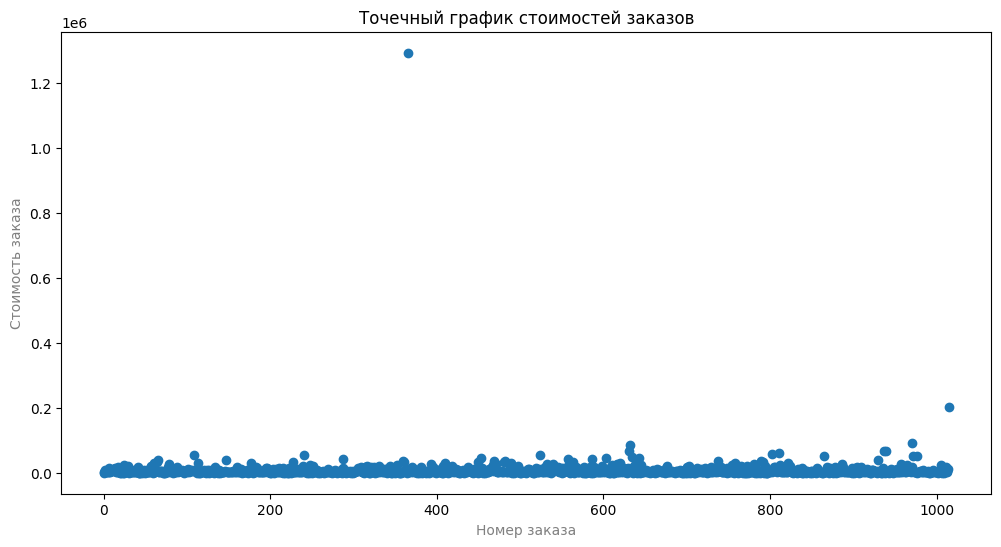

In [55]:
plt.scatter(orders.index, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Номер заказа', color='gray')
plt.ylabel('Стоимость заказа', color='gray')
plt.show()

Основная масса заказов стоимостью ниже 20 000 рублей.

In [56]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рублей. Возьмем сумму заказа в 30 000, как границу для фильтра аномалий.

Объединим исходные данные в общую таблицу с подсчитанными куммулятивными данными.

In [57]:
data = cumulativeData.merge(orders.query('group == "A"').groupby('date')[['revenue', 'transactionId']].agg({'revenue':'sum', 'transactionId': 'nunique'}), on='date')

In [58]:
data = data.merge(orders.query('group == "B"').groupby('date')[['revenue', 'transactionId']].agg({'revenue':'sum', 'transactionId': 'nunique'}), on='date')

In [59]:
data = data.merge(visitors.query('group == "A"').groupby('date')['visitors'].sum(), on='date')

In [60]:
data = data.merge(visitors.query('group == "B"').groupby('date')['visitors'].sum(), on='date')

In [61]:
data.head()

,date,revenueA,ordersA,revenueB,ordersB,visitorsA,visitorsB,revenue_x,transactionId_x,revenue_y,transactionId_y,visitors_x,visitors_y
0,2019-08-01,142779,23,59758,17,719,713,142779,23,59758,17,719,713
1,2019-08-02,234381,42,221801,40,1338,1294,91602,19,162043,23,619,581
2,2019-08-03,346854,66,288850,54,1845,1803,112473,24,67049,14,507,509
3,2019-08-04,388030,77,385740,68,2562,2573,41176,11,96890,14,717,770
4,2019-08-05,474413,99,475648,89,3318,3280,86383,22,89908,21,756,707


In [62]:
data.columns = ['date', 'revenueCummulativeA', 'ordersCummulativeA', 'revenueCummulativeB', 'ordersCummulativeB', 'visitorsCummulativeA', 'visitorsCummulativeB', 'revenuePerDateA', 'ordersPerDateA', 'revenuePerDateB', 'ordersPerDateB', 'visitorsPerDateA', 'visitorsPerDateB']

In [63]:
data.head()

,date,revenueCummulativeA,ordersCummulativeA,revenueCummulativeB,ordersCummulativeB,visitorsCummulativeA,visitorsCummulativeB,revenuePerDateA,ordersPerDateA,revenuePerDateB,ordersPerDateB,visitorsPerDateA,visitorsPerDateB
0,2019-08-01,142779,23,59758,17,719,713,142779,23,59758,17,719,713
1,2019-08-02,234381,42,221801,40,1338,1294,91602,19,162043,23,619,581
2,2019-08-03,346854,66,288850,54,1845,1803,112473,24,67049,14,507,509
3,2019-08-04,388030,77,385740,68,2562,2573,41176,11,96890,14,717,770
4,2019-08-05,474413,99,475648,89,3318,3280,86383,22,89908,21,756,707


In [64]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

In [65]:
ordersByUsersA.columns = ['userId', 'orders']

In [66]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

In [67]:
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 

In [68]:
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

In [69]:
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Рассмотрим гипотезы

H0 - Нет различий в среднем числе заказов на поситетеля между группами.
<br> H1 - Есть различия в среднем числе заказов на поситетеля между группами.

Проверять гипотезы будем с помощью непараметрического теста Уилкоксона-Манна-Уитни. Выбираем его, так как в данных есть существенные выбросы.

In [70]:
print('p-value: ' "{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

p-value: 0.011


In [71]:
if st.mannwhitneyu(sampleA, sampleB)[1] > 0.05:
    print("Не отвергаем нулевую гипотезу")
else: print("Нулевую гипотезу отвергаем")

Нулевую гипотезу отвергаем


In [72]:
print('Относительная разница между сравниваемыми величинами: '"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

Относительная разница между сравниваемыми величинами: 0.160


Различия в среднем числе заказов на поситетеля между группами есть. Выигрыш группы B составляет 13.8%

H0 - Нет различий в среднем чеке между группами.
<br> H1 - Есть различия в среднем чеке между группами.

In [73]:
if st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1] > 0.05:
    print("Не отвергаем нулевую гипотезу")
else: print("Нулевую гипотезу отвергаем")

Не отвергаем нулевую гипотезу


In [74]:
print('Относительная разница между сравниваемыми величинами: ' '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Относительная разница между сравниваемыми величинами: 0.287


In [75]:
print('p-value: ''{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

p-value: 0.829


Нулевая гипотеза не отвергнута, значит оснований считать, что есть различия в среднем чеке нет. Средний чек группы B выше группы А.

Примем за аномальных пользователей тех, кто совершил больше двух заказов или совершил заказ дороже 30 000 рублей. 

In [76]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)

In [77]:
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']

In [78]:
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Аболютные потери группы А - количество аномальных пользователей с числом закзаов большим двух в группе А.

In [79]:
ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'].count()

5

Аболютные потери группы B - количество аномальных пользователей с числом закзаов большим двух в группе B

In [80]:
ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'].count()

2

Относительные потери группы А

In [81]:
np.round(ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'].count() / orders.query('group == "A"')['visitorId'].nunique(), 2)

0.01

Относительные потери группы B

In [82]:
np.round(ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'].count() / orders.query('group == "B"')['visitorId'].nunique(), 2)

0.0

Аболютные потери  - количество аномальных пользователей с суммой заказа большей 30000.

In [83]:
orders[orders['revenue'] > 30000]['visitorId'].nunique()

42

Относительные потери

In [84]:
np.round(orders[orders['revenue'] > 30000]['visitorId'].nunique() / orders['visitorId'].nunique(), 2)

0.04

Все потери составляют не более 5%

In [85]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [86]:
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

H0 - Нет различий в среднем числе заказов на пользовтаеля между группами.
<br> H1 - Есть различия в среднем числе заказов на пользовтаеля между группами.

In [87]:
print('p-value: ''{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

p-value: 0.010


In [88]:
print('Относительная разница между сравниваемыми величинами:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Относительная разница между сравниваемыми величинами: 0.187


In [89]:
if st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1] > 0.05:
    print("Не отвергаем нулевую гипотезу")
else: print("Нулевую гипотезу отвергаем")

Нулевую гипотезу отвергаем


Результаты по среднему количеству заказов на пользователя практически не изменились.

H0 - Нет различий в среднем чеке между группами.
<br> H1 - Есть различия в среднем чеке между группами.

In [90]:
print('p-value: ''{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    ))

p-value: 0.741


In [91]:
print('Относительная разница между сравниваемыми величинами: ' '{0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    ))

Относительная разница между сравниваемыми величинами: -0.027


In [92]:
if st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1] > 0.05:
    print("Не отвергаем нулевую гипотезу")
else: print("Нулевую гипотезу отвергаем")

Не отвергаем нулевую гипотезу


P-value практически не изменился, разница в среднем чеке группы В и группы А сократилась, средний чек группы В теперь чуть ниже группы А.

Подведем итог:
- Есть статистически значимое различие в среднем числе заказов между группами по сырым данным, так и после фильтрации аномалий, однако группа B выигрывает груупу А.
- По сырым данным нет статистически значимого различия по среднему чеку между группами, после удаления аномалий статистически значимое различия также нет. При этом группа B уже проигрывает группе А.
- График различия среднего количества заказов на посетителя между группами сообщает, что результаты группы B лучше группы A: зафиксировались около среднего значения.
- График различия среднего чека колеблется, однако группа B в основном выиграет группу А.

По итогу тестирования можно остановить тест, признать победу группы В.